# 연구과제(2) 풀이

## #01. 준비작업

### [1] 패키지 가져오기

In [2]:
import warnings
warnings.filterwarnings(action='ignore')

from hossam.util import *
from hossam.plot import *
from hossam.analysis import *
from hossam.classification import *

### [2] 데이터 가져오기

In [3]:
origin = my_read_excel("https://data.hossam.kr/mldata/apple_quality.xlsx", index_col='A_id', categories=['Quality'])

<class 'pandas.core.frame.DataFrame'>
Index: 4001 entries, 0.0 to nan
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   Size         4000 non-null   float64 
 1   Weight       4000 non-null   float64 
 2   Sweetness    4000 non-null   float64 
 3   Crunchiness  4000 non-null   float64 
 4   Juiciness    4000 non-null   float64 
 5   Ripeness     4000 non-null   float64 
 6   Acidity      4001 non-null   object  
 7   Quality      4000 non-null   category
dtypes: category(1), float64(6), object(1)
memory usage: 254.1+ KB
None

데이터프레임 상위 5개 행
+--------+-----------+----------+-------------+---------------+-------------+------------+-----------+-----------+
|   A_id |      Size |   Weight |   Sweetness |   Crunchiness |   Juiciness |   Ripeness |   Acidity | Quality   |
|--------+-----------+----------+-------------+---------------+-------------+------------+-----------+-----------|
|      0 |  -3.97005 | -2.51234 |  

> 마지막 행에 불필요한 내용이 포함되어 있는 부분은 삭제가 필요함
>
> 종속변수에 따른 데이터 불균형은 보이지 않는다.

## #02. 데이터 전처리 + 데이터 살펴보기

### [1] 불필요한 행 제거

In [4]:
df = origin.dropna()
df

,Size,Weight,Sweetness,Crunchiness,Juiciness,Ripeness,Acidity,Quality
A_id,,,,,,,,
0.0,-3.970049,-2.512336,5.346330,-1.012009,1.844900,0.329840,-0.49159,good
1.0,-1.195217,-2.839257,3.664059,1.588232,0.853286,0.867530,-0.722809,good
2.0,-0.292024,-1.351282,-1.738429,-0.342616,2.838636,-0.038033,2.621636,bad
3.0,-0.657196,-2.271627,1.324874,-0.097875,3.637970,-3.413761,0.790723,good
4.0,1.364217,-1.296612,-0.384658,-0.553006,3.030874,-1.303849,0.501984,good
...,...,...,...,...,...,...,...,...
3995.0,0.059386,-1.067408,-3.714549,0.473052,1.697986,2.244055,0.137784,bad
3996.0,-0.293118,1.949253,-0.204020,-0.640196,0.024523,-1.087900,1.854235,good
3997.0,-2.634515,-2.138247,-2.440461,0.657223,2.199709,4.763859,-1.334611,bad


### [2] 상자그림을 통한 데이터 분포 확인

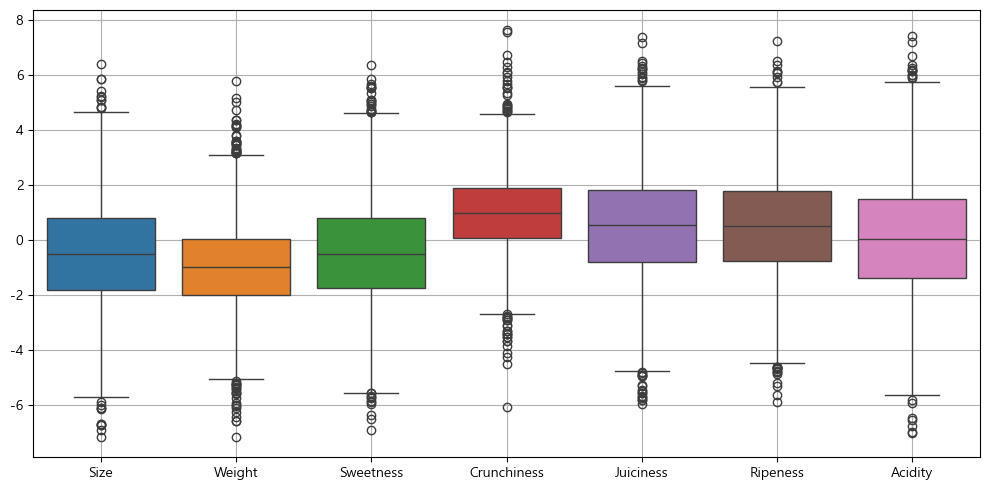

In [5]:
my_boxplot(df)

> 이상치가 다수 확인된다. (이상치 제거 전후에 대한 비교 필요)
>
> 데이터 분포가 판단이 애매함 (스케일링 전후에 대한 비교 필요)

### [3] 종속변수에 따른 데이터 분포 확인

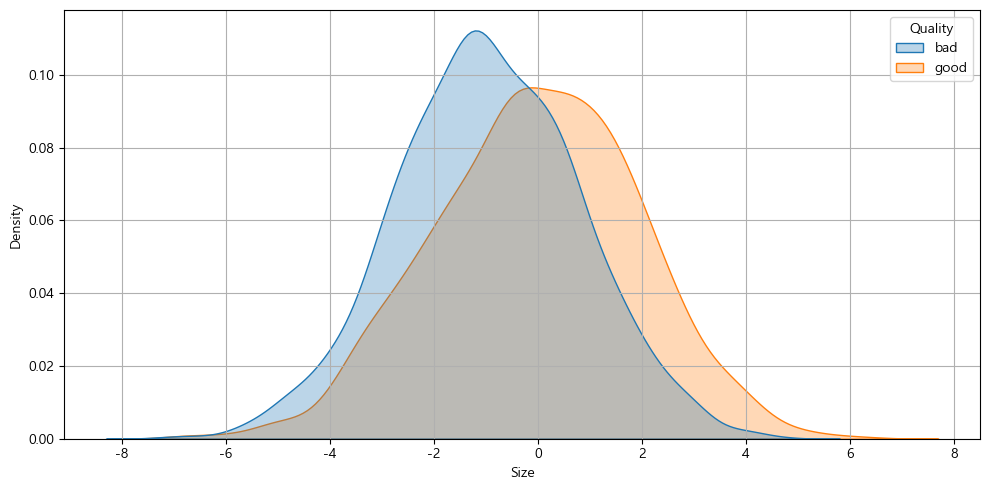

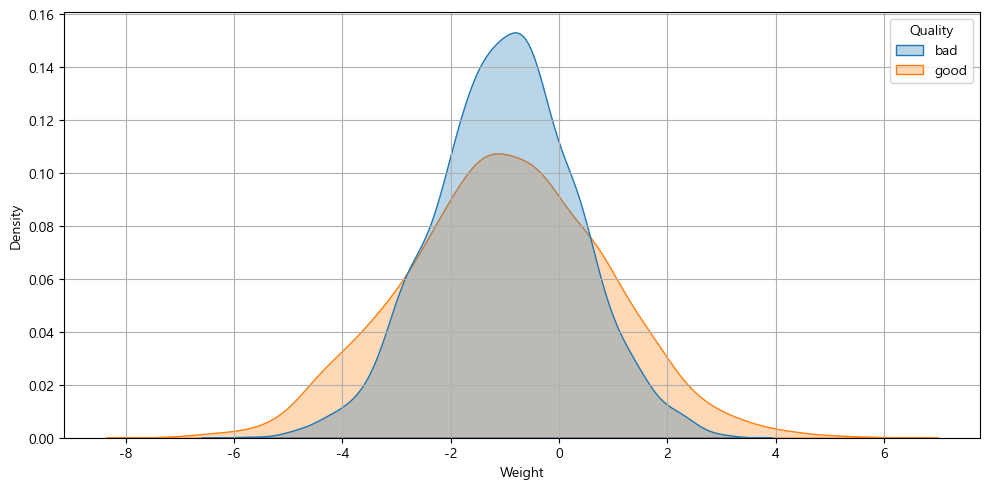

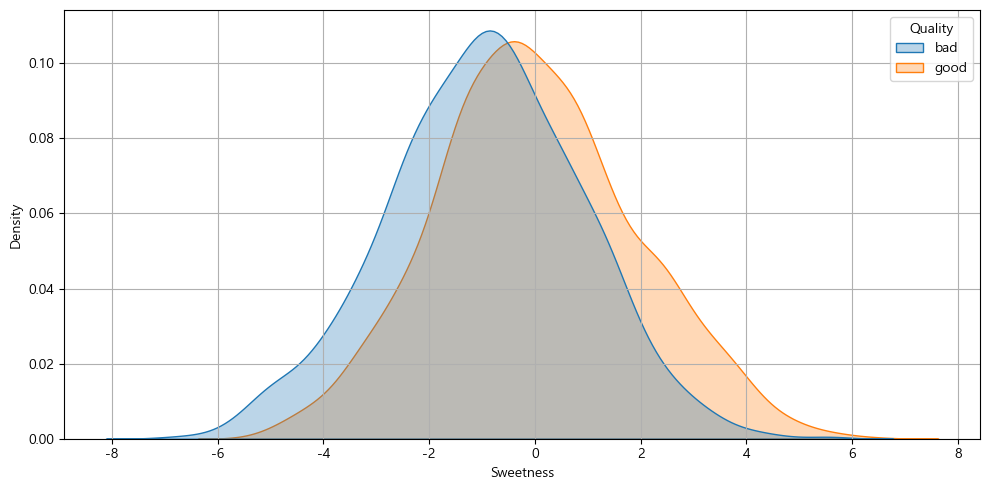

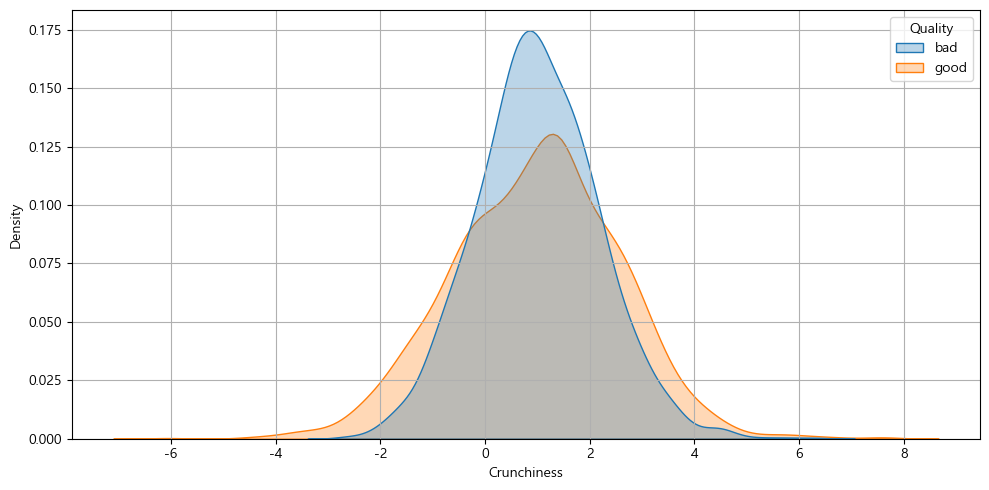

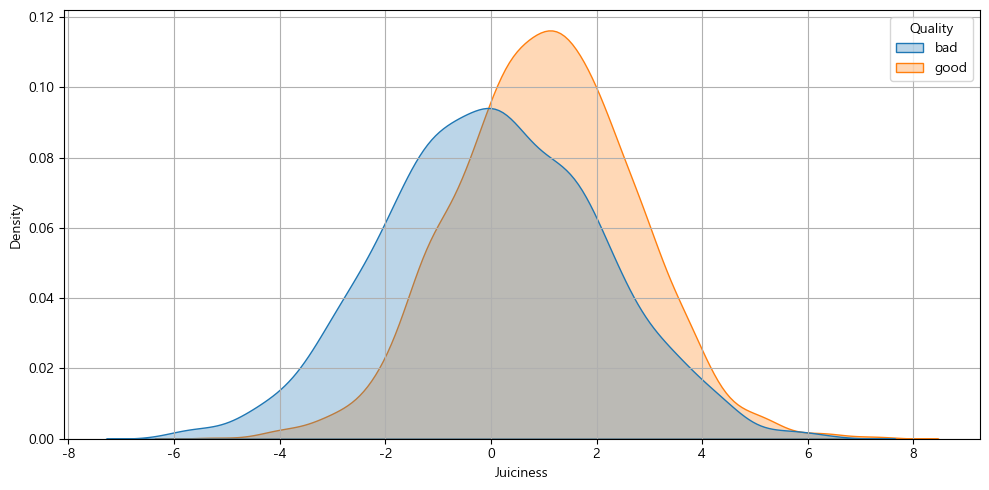

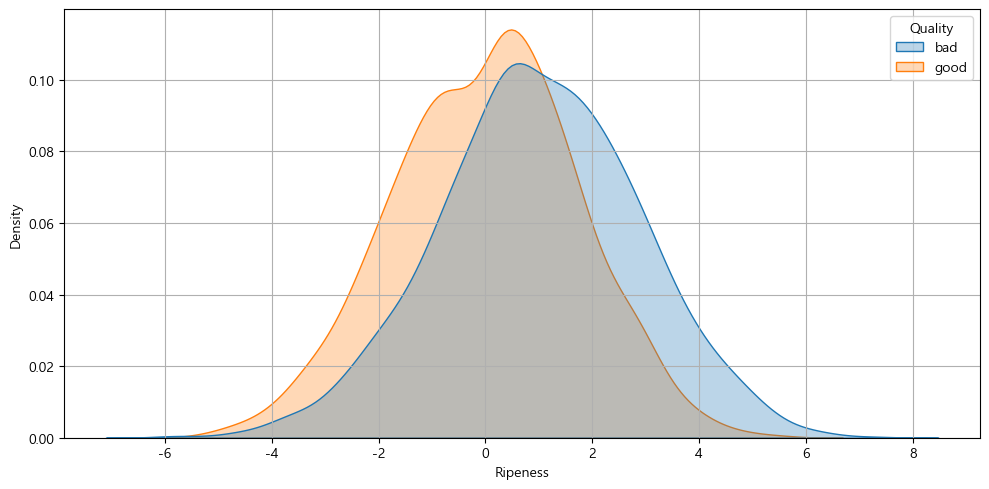

In [6]:
my_distribution_by_class(df, hue='Quality', fill=True)

> 대부분의 변수가 품질에 따라 평균에 유의미한 차이를 보인다.
>
> 무게(Weight),  바삭함(Crunchiness)은 품질에 따른 차이가 크지 않은 것으로 생각된다. (제외 전후에 대한 결과 비교 필요)

### [4] 종속변수 라벨링

In [7]:
df2 = my_labelling(df, 'Quality')
df2

,Size,Weight,Sweetness,Crunchiness,Juiciness,Ripeness,Acidity,Quality
A_id,,,,,,,,
0.0,-3.970049,-2.512336,5.346330,-1.012009,1.844900,0.329840,-0.49159,1
1.0,-1.195217,-2.839257,3.664059,1.588232,0.853286,0.867530,-0.722809,1
2.0,-0.292024,-1.351282,-1.738429,-0.342616,2.838636,-0.038033,2.621636,0
3.0,-0.657196,-2.271627,1.324874,-0.097875,3.637970,-3.413761,0.790723,1
4.0,1.364217,-1.296612,-0.384658,-0.553006,3.030874,-1.303849,0.501984,1
...,...,...,...,...,...,...,...,...
3995.0,0.059386,-1.067408,-3.714549,0.473052,1.697986,2.244055,0.137784,0
3996.0,-0.293118,1.949253,-0.204020,-0.640196,0.024523,-1.087900,1.854235,1
3997.0,-2.634515,-2.138247,-2.440461,0.657223,2.199709,4.763859,-1.334611,0


## #03. 분석하기

### [1] Case 1 - 기본 변수 그대로 진행

#### (1) 훈련, 검증 데이터 분리

In [8]:
x_train, x_test, y_train, y_test = my_train_test_split(df2, yname='Quality', scalling=False)
x_train.shape, x_test.shape, y_train.shape, y_test.shape

((3200, 7), (800, 7), (3200,), (800,))

#### (2) 로지스틱 회귀

[교차검증]
+----+-------+------------+-----------+-------------------+
|    |     C |   max_iter | penalty   |   mean_test_score |
|----+-------+------------+-----------+-------------------|
| 13 |    10 |        500 | l2        |          0.752812 |
| 16 |   100 |        500 | l2        |          0.752812 |
| 10 |     1 |        500 | l2        |            0.7525 |
|  7 |   0.1 |        500 | l2        |          0.752188 |
|  4 |  0.01 |        500 | l2        |          0.749688 |
|  1 | 0.001 |        500 | l2        |          0.733125 |
+----+-------+------------+-----------+-------------------+

[분류분석 성능평가]
+-------------------------+--------------+--------------+-----------------------------------------------------------+
|                         |   훈련데이터 |   검증데이터 | 설명                                                      |
|-------------------------+--------------+--------------+-----------------------------------------------------------|
| 의사결정계수(Pseudo R2) |     0.267281 |  

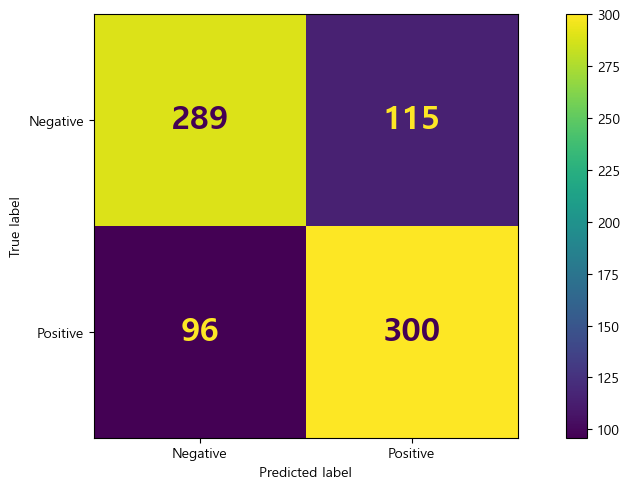


[Roc Curve]


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


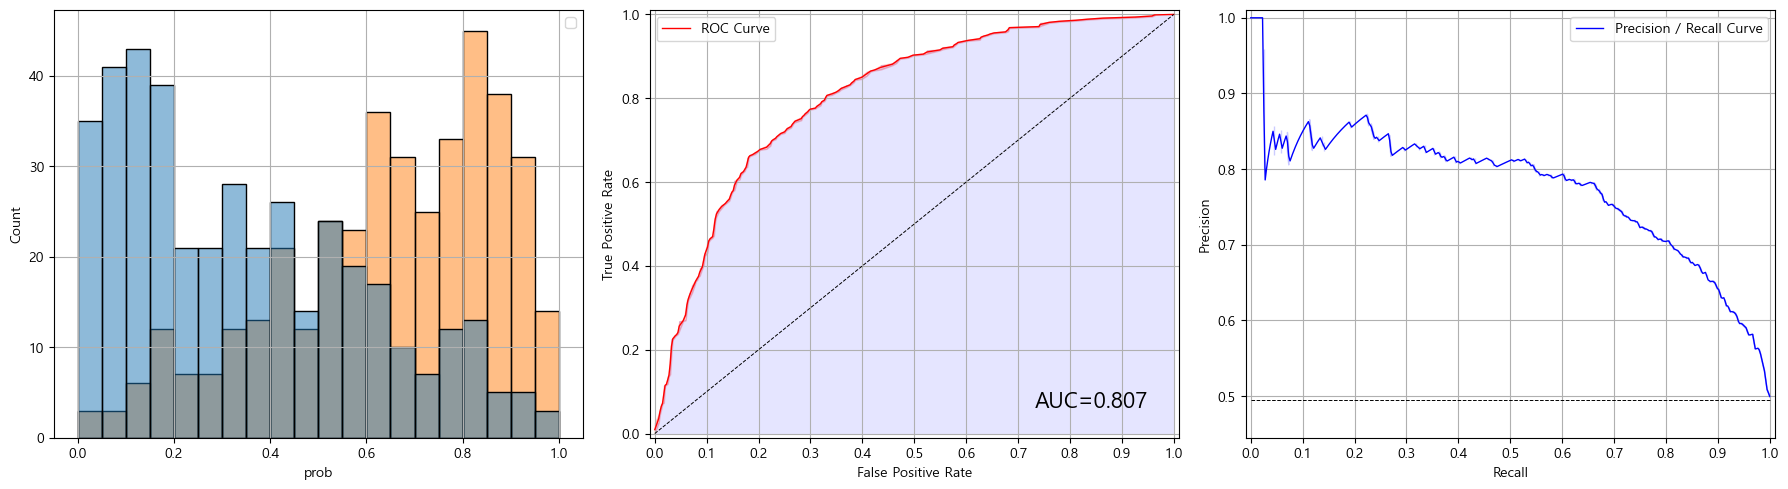


[학습곡선]


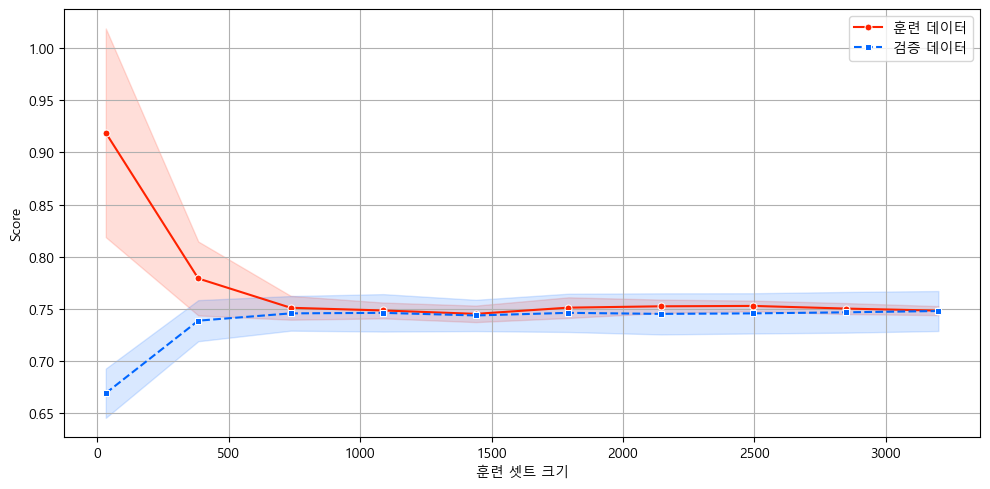

LogisticRegression(C=10, max_iter=500, n_jobs=-1)

In [9]:
my_logistic_classification(x_train, y_train, x_test, y_test)

#### (3) KNN

[교차검증]
+----+-----------+---------------+-----------+-------------------+
|    | metric    |   n_neighbors | weights   |   mean_test_score |
|----+-----------+---------------+-----------+-------------------|
|  5 | euclidean |             7 | distance  |           0.89875 |
|  4 | euclidean |             7 | uniform   |            0.8975 |
|  2 | euclidean |             5 | uniform   |          0.895937 |
|  3 | euclidean |             5 | distance  |          0.895312 |
| 11 | manhattan |             7 | distance  |          0.890938 |
|  8 | manhattan |             5 | uniform   |          0.889062 |
|  9 | manhattan |             5 | distance  |          0.889062 |
| 10 | manhattan |             7 | uniform   |          0.888437 |
|  1 | euclidean |             3 | distance  |          0.886562 |
|  0 | euclidean |             3 | uniform   |           0.88625 |
|  7 | manhattan |             3 | distance  |          0.880937 |
|  6 | manhattan |             3 | uniform   |         

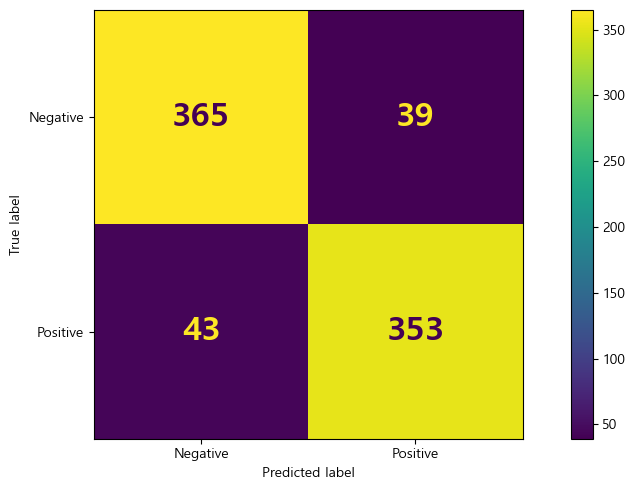

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.



[Roc Curve]


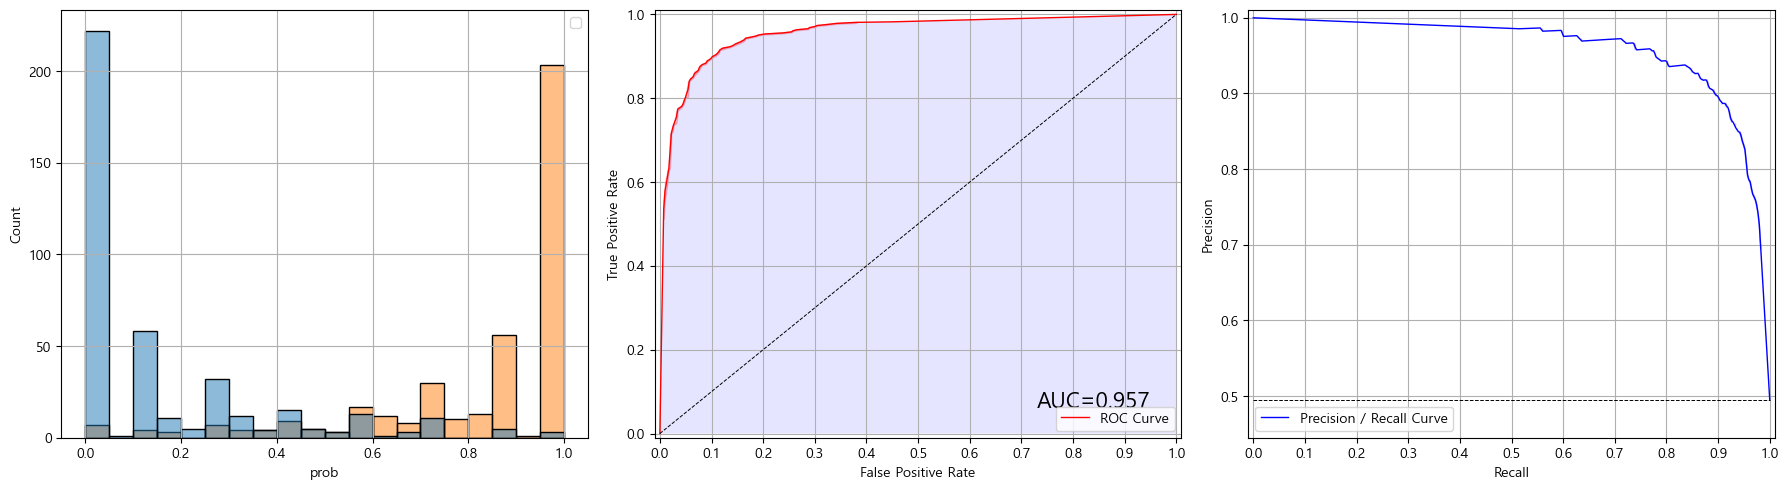


[학습곡선]


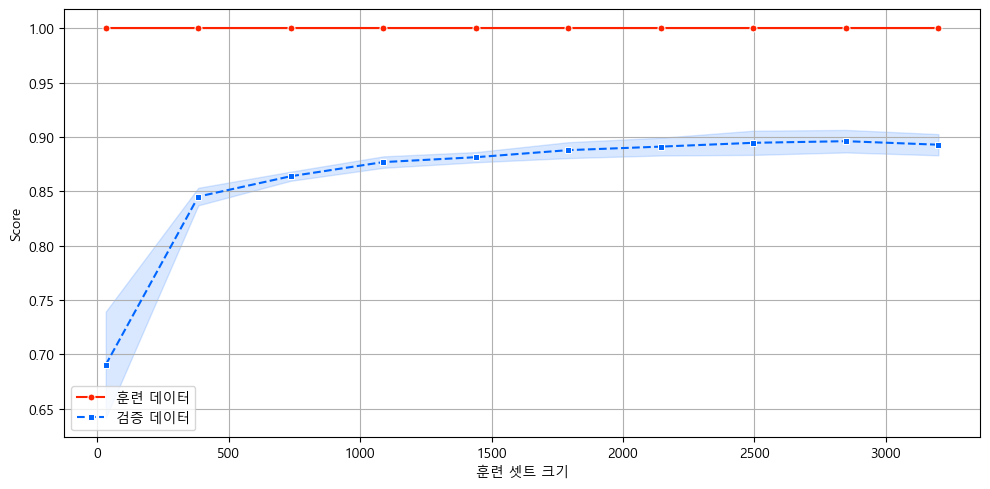

KNeighborsClassifier(metric='euclidean', n_jobs=-1, n_neighbors=7,
                     weights='distance')

In [10]:
my_knn_classification(x_train, y_train, x_test, y_test)

### [2] Case 2 - 스케일링 처리 후 비교

#### (1) 훈련 검증 데이터 분리 + 데이터 스케일링

In [11]:
x_train, x_test, y_train, y_test = my_train_test_split(df2, yname='Quality', scalling=True)
x_train.shape, x_test.shape, y_train.shape, y_test.shape

((3200, 7), (800, 7), (3200,), (800,))

#### (2) 로지스틱

[교차검증]
+----+-------+------------+-----------+-------------------+
|    |     C |   max_iter | penalty   |   mean_test_score |
|----+-------+------------+-----------+-------------------|
| 13 |    10 |        500 | l2        |          0.752812 |
| 16 |   100 |        500 | l2        |          0.752812 |
| 10 |     1 |        500 | l2        |            0.7525 |
|  7 |   0.1 |        500 | l2        |          0.750937 |
|  4 |  0.01 |        500 | l2        |          0.745313 |
|  1 | 0.001 |        500 | l2        |             0.725 |
+----+-------+------------+-----------+-------------------+

[분류분석 성능평가]
+-------------------------+--------------+--------------+-----------------------------------------------------------+
|                         |   훈련데이터 |   검증데이터 | 설명                                                      |
|-------------------------+--------------+--------------+-----------------------------------------------------------|
| 의사결정계수(Pseudo R2) |     0.267281 |  

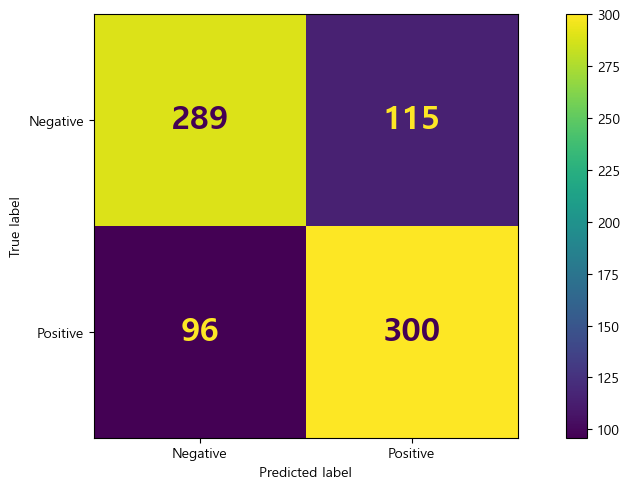


[Roc Curve]


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


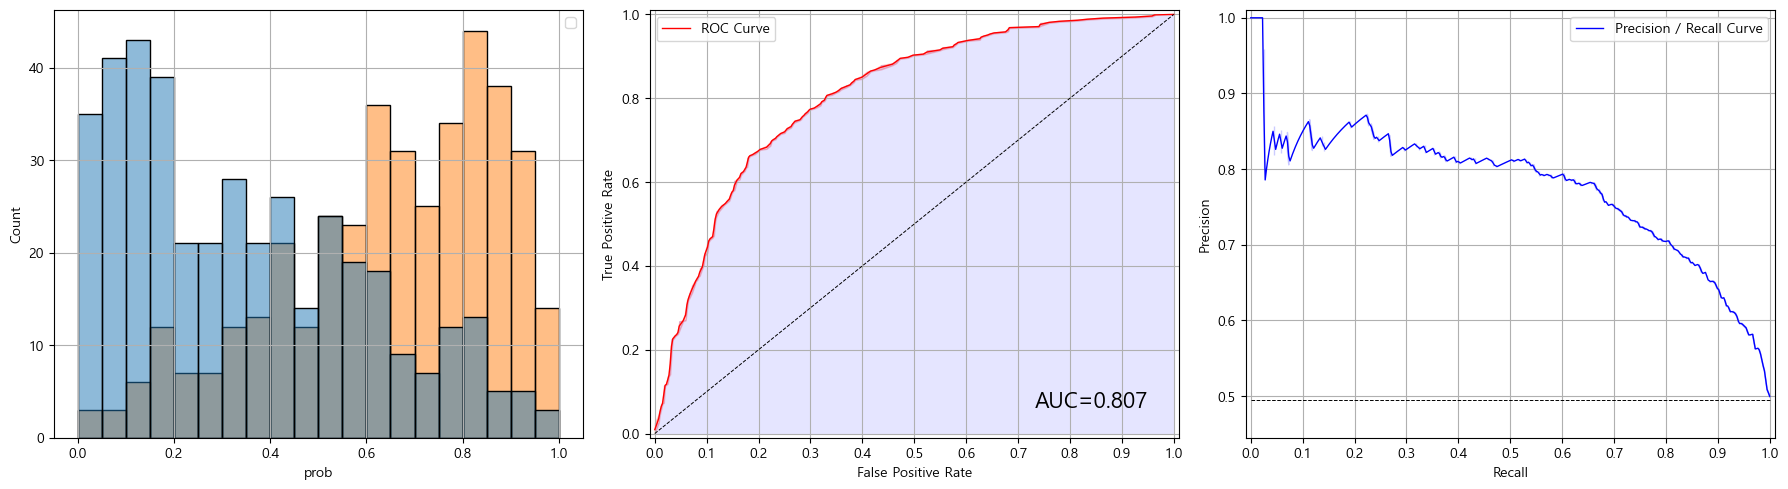


[학습곡선]


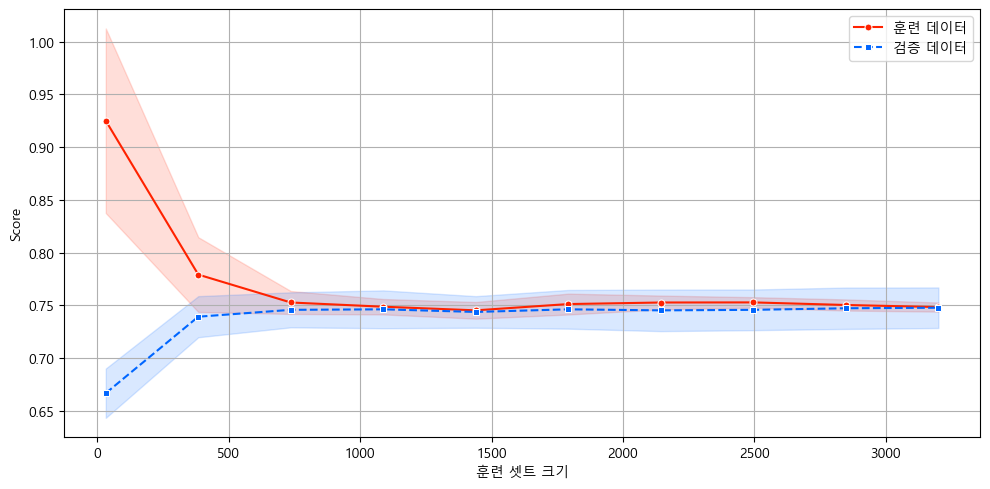

LogisticRegression(C=10, max_iter=500, n_jobs=-1)

In [12]:
my_logistic_classification(x_train, y_train, x_test, y_test)

#### (3) KNN

[교차검증]
+----+-----------+---------------+-----------+-------------------+
|    | metric    |   n_neighbors | weights   |   mean_test_score |
|----+-----------+---------------+-----------+-------------------|
|  4 | euclidean |             7 | uniform   |          0.900625 |
|  5 | euclidean |             7 | distance  |          0.900313 |
|  2 | euclidean |             5 | uniform   |          0.892813 |
|  3 | euclidean |             5 | distance  |          0.892813 |
| 11 | manhattan |             7 | distance  |          0.892813 |
| 10 | manhattan |             7 | uniform   |          0.892188 |
|  9 | manhattan |             5 | distance  |           0.88875 |
|  0 | euclidean |             3 | uniform   |          0.888437 |
|  1 | euclidean |             3 | distance  |          0.888437 |
|  8 | manhattan |             5 | uniform   |          0.888125 |
|  7 | manhattan |             3 | distance  |           0.88375 |
|  6 | manhattan |             3 | uniform   |         

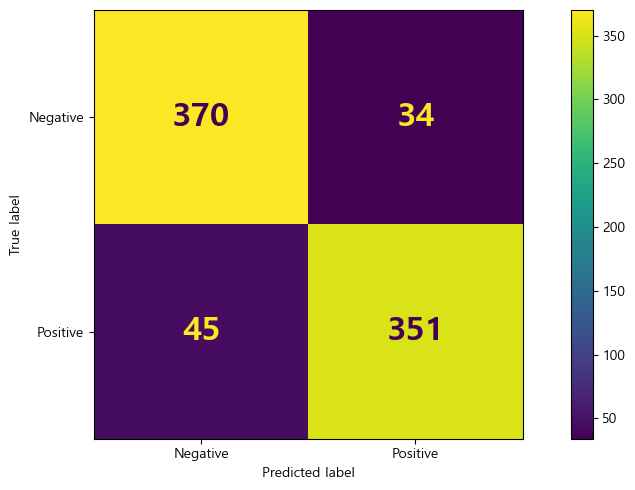


[Roc Curve]


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


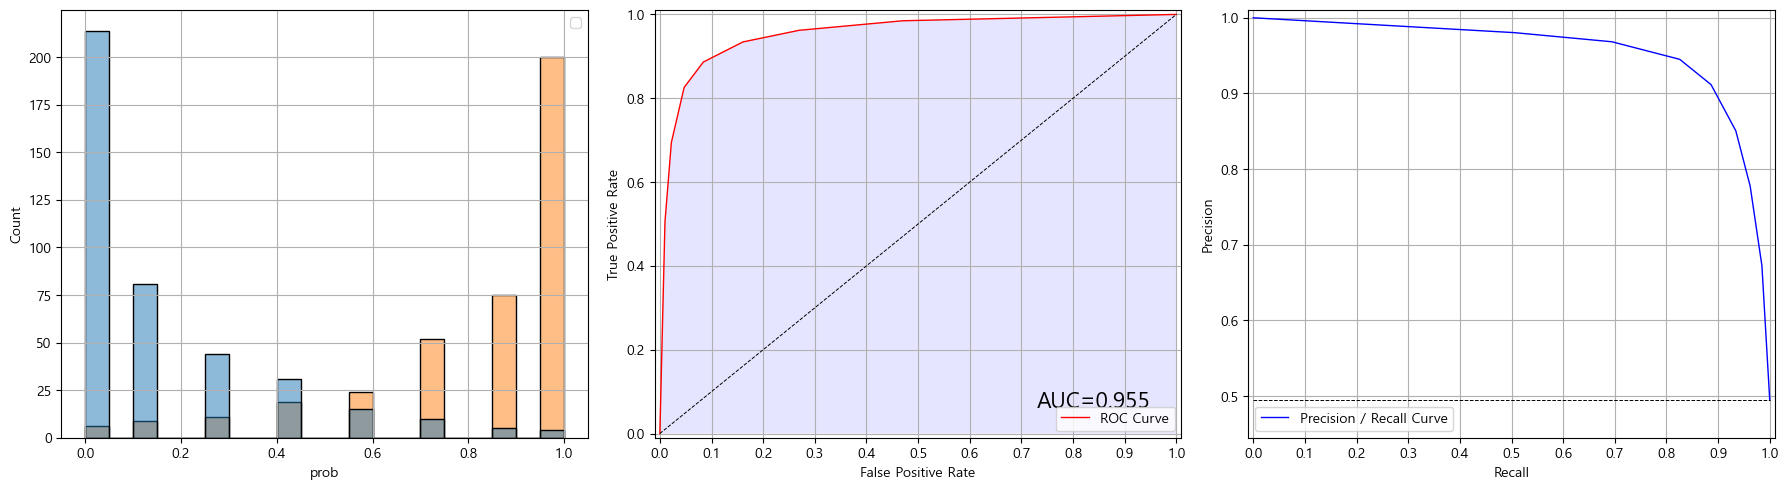


[학습곡선]


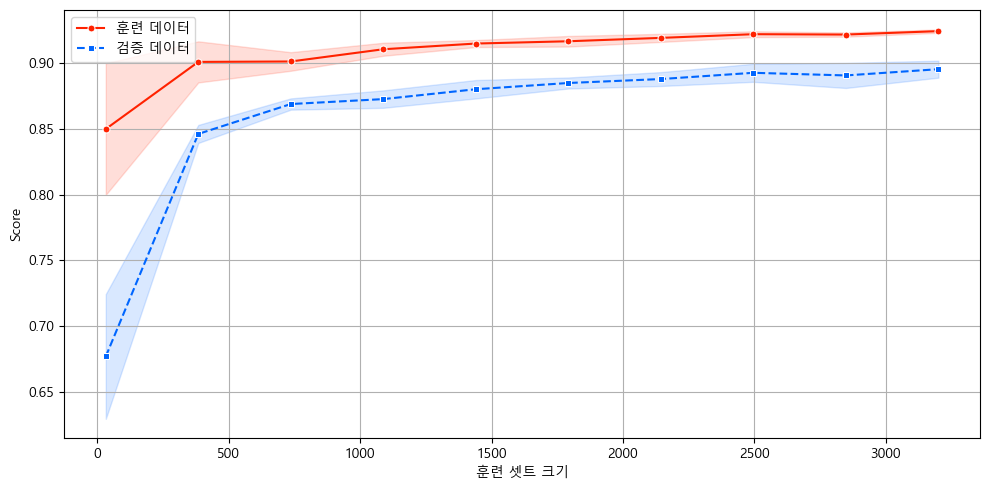

KNeighborsClassifier(metric='euclidean', n_jobs=-1, n_neighbors=7)

In [13]:
my_knn_classification(x_train, y_train, x_test, y_test)

### [3] Case 3 - 영향이 적은 것으로 보이는 변수 제거

#### (1) 변수 제거 후 훈련, 검증 데이터 분리

In [15]:
df3 = df2.drop(['Weight', 'Crunchiness'], axis=1)

x_train, x_test, y_train, y_test = my_train_test_split(df3, yname='Quality', scalling=True)
x_train.shape, x_test.shape, y_train.shape, y_test.shape

((3200, 5), (800, 5), (3200,), (800,))

#### (2) 로지스틱

[교차검증]
+----+-------+------------+-----------+-------------------+
|    |     C |   max_iter | penalty   |   mean_test_score |
|----+-------+------------+-----------+-------------------|
|  4 |  0.01 |        500 | l2        |          0.739375 |
| 13 |    10 |        500 | l2        |          0.736563 |
| 16 |   100 |        500 | l2        |          0.736563 |
|  7 |   0.1 |        500 | l2        |          0.735938 |
| 10 |     1 |        500 | l2        |          0.735938 |
|  1 | 0.001 |        500 | l2        |           0.72625 |
+----+-------+------------+-----------+-------------------+

[분류분석 성능평가]
+-------------------------+--------------+--------------+-----------------------------------------------------------+
|                         |   훈련데이터 |   검증데이터 | 설명                                                      |
|-------------------------+--------------+--------------+-----------------------------------------------------------|
| 의사결정계수(Pseudo R2) |     0.236797 |  

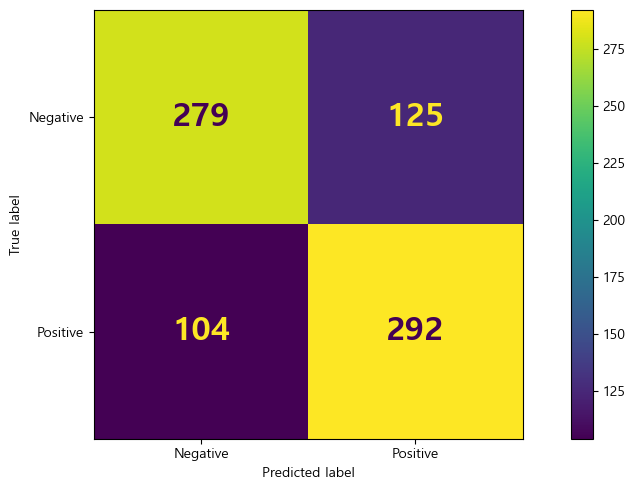


[Roc Curve]


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


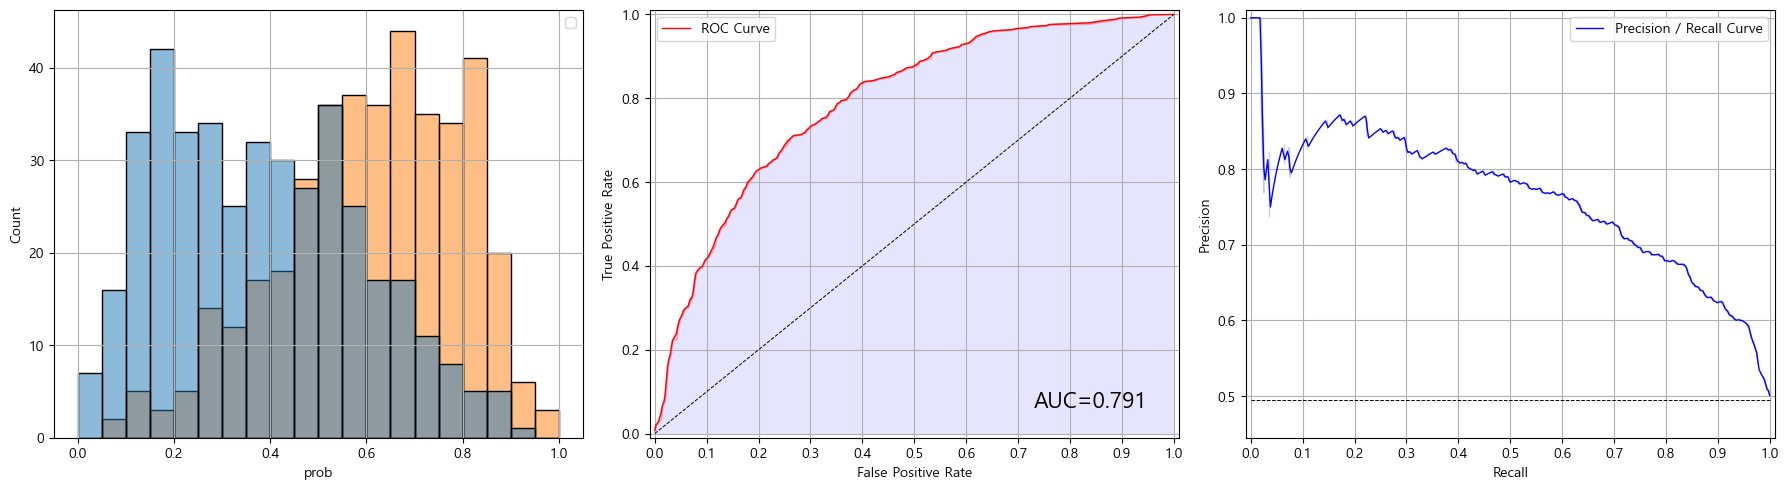


[학습곡선]


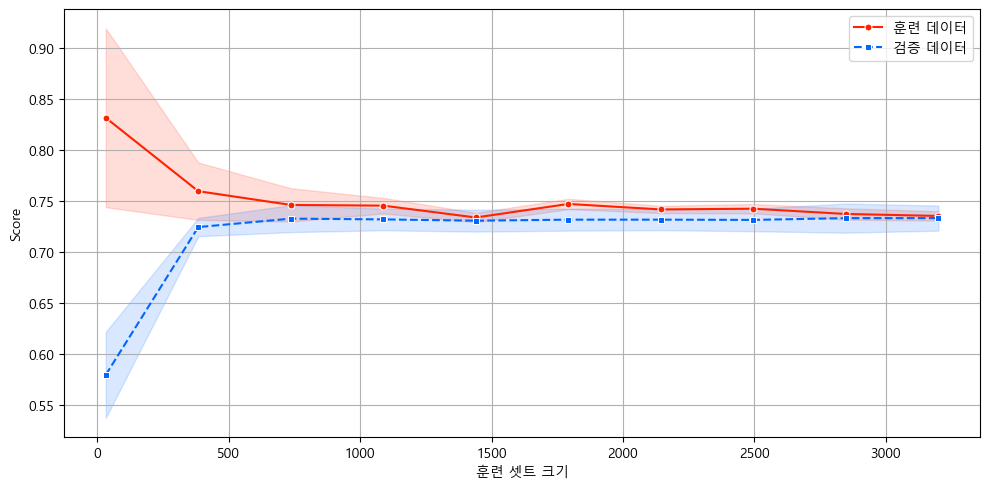

LogisticRegression(C=0.01, max_iter=500, n_jobs=-1)

In [16]:
my_logistic_classification(x_train, y_train, x_test, y_test)

#### (3) KNN

[교차검증]
+----+-----------+---------------+-----------+-------------------+
|    | metric    |   n_neighbors | weights   |   mean_test_score |
|----+-----------+---------------+-----------+-------------------|
| 10 | manhattan |             7 | uniform   |          0.833437 |
|  4 | euclidean |             7 | uniform   |          0.832813 |
| 11 | manhattan |             7 | distance  |          0.832188 |
|  5 | euclidean |             7 | distance  |          0.831563 |
|  2 | euclidean |             5 | uniform   |          0.829063 |
|  3 | euclidean |             5 | distance  |          0.828125 |
|  9 | manhattan |             5 | distance  |          0.822188 |
|  0 | euclidean |             3 | uniform   |          0.822187 |
|  1 | euclidean |             3 | distance  |          0.821875 |
|  8 | manhattan |             5 | uniform   |          0.820312 |
|  6 | manhattan |             3 | uniform   |          0.813125 |
|  7 | manhattan |             3 | distance  |         

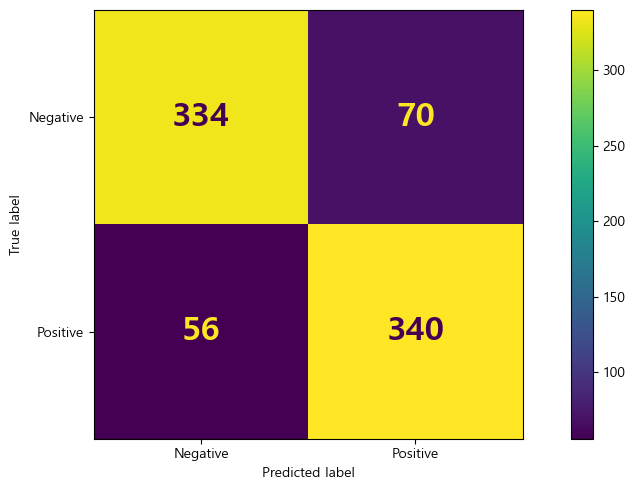

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.



[Roc Curve]


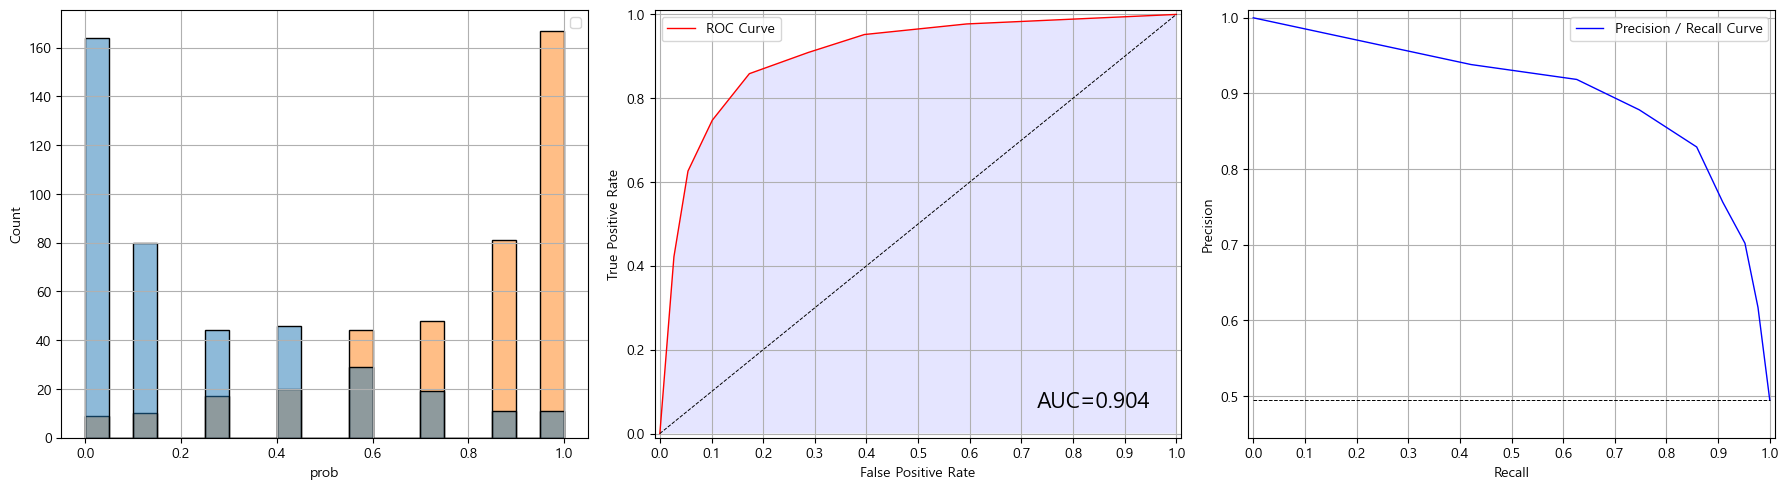


[학습곡선]


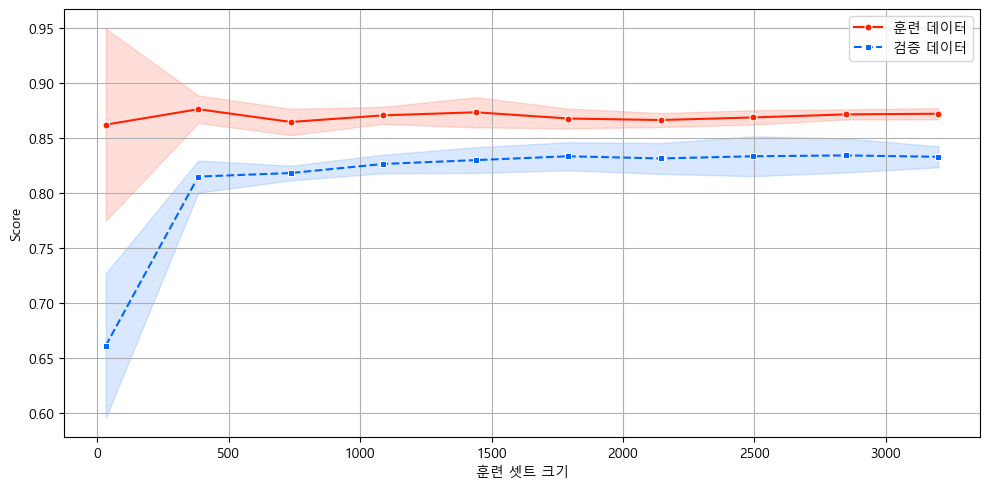

KNeighborsClassifier(metric='manhattan', n_jobs=-1, n_neighbors=7)

In [17]:
my_knn_classification(x_train, y_train, x_test, y_test)

> 일부 변수를 제외하고 분석한 결과 정확도와 정밀도 등의 성능 평가지수가 다소 떨어지는 것을 확인할 수 있다. 그러므로 변수 제거는 적절한 전처리가 아닌 것으로 판단.

## #04. 결과 비교를 위한 모듈 기능 확인

In [18]:
my_classification(x_train, y_train, x_test, y_test)

+----------------------+---------------------------+--------------------+---------------------+------------------+---------------------+---------------+------------+----------+
|                      |   의사결정계수(Pseudo R2) |   정확도(Accuracy) |   정밀도(Precision) |   재현율(Recall) |   위양성율(Fallout) |   특이성(TNR) |   F1 Score |      AUC |
|----------------------+---------------------------+--------------------+---------------------+------------------+---------------------+---------------+------------+----------|
| LogisticRegression   |                  0.198939 |            0.71375 |             0.70024 |         0.737374 |            0.309406 |      0.690594 |   0.718327 | 0.791304 |
| KNeighborsClassifier |                         0 |             0.8425 |            0.829268 |         0.858586 |            0.173267 |      0.826733 |   0.843672 | 0.904284 |
+----------------------+---------------------------+--------------------+---------------------+------------------+---------------------+-

In [ ]:
}